# Import and Prepare Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read Census data CSV file into dataframe for Education Scores
census_df = pd.read_csv('Census Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32,
                             'StateScore':np.float32
                     }).iloc[:,1:]

# read IRS AGI data CSV file into dataframe for Income Scores
IRS_df = pd.read_csv('IRS AGI Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32,
                             'StateScore':np.float32
                     }).iloc[:,1:]


df_2011_2017 = pd.DataFrame(data={'ZIPCODE':[0,0],'ZipScore':[0,0]})

df_2011_2017 = df_2011_2017.merge(census_df[['ZIPCODE','ZipScore']][census_df.YEAR == 2011], 
                                  on = 'ZIPCODE', how='outer')[2:].rename(columns={'ZipScore_y':'edu_score_2011'})
df_2011_2017 = df_2011_2017.merge(census_df[['ZIPCODE','ZipScore']][census_df.YEAR == 2017], 
                                  on = 'ZIPCODE', how='outer').rename(columns={'ZipScore':'edu_score_2017'})
df_2011_2017 = df_2011_2017.merge(IRS_df[['ZIPCODE','ZipScore']][IRS_df.YEAR == 2011], 
                                  on = 'ZIPCODE', how='outer').rename(columns={'ZipScore':'income_score_2011'})
df_2011_2017 = df_2011_2017.merge(IRS_df[['ZIPCODE','ZipScore']][IRS_df.YEAR == 2017], 
                                  on = 'ZIPCODE', how='outer').rename(columns={'ZipScore':'income_score_2017'})

df_2011_2017 = df_2011_2017.drop(['ZipScore_x'], axis=1).dropna()

# Step 1: Conduct EDA
Plot ECDFs for all years available for Education and Income Scores with color variation to show change over time. **Only use 2011 and 2017 data due to intersection of annual releases of datasets**.

In [2]:
# Define ECDF function as explained in DataCamp online module (Statistical Thinking in Python - Part 1)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

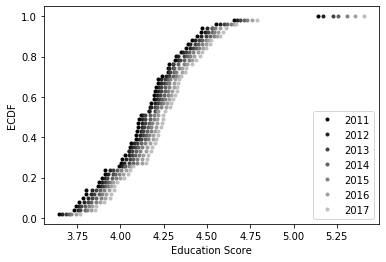

In [3]:
# Compute ECDF for Education Scores for each State for 2011-2017: x_val, y_val
census_subset_df = census_df[['STATE','StateScore','YEAR']][census_df.YEAR < 2018].drop_duplicates()

for i, yr in enumerate(census_subset_df.YEAR.unique()):
    x_val, y_val = ecdf(census_subset_df[census_subset_df.YEAR==yr].StateScore)

    # Generate plot
    plt.plot(x_val, y_val, marker = '.',linestyle = 'none',color=str(i/len(census_df.YEAR.unique())),label = str(yr))

# Label the axes
plt.xlabel('Education Score')
plt.ylabel('ECDF')
plt.legend(loc='lower right')


# Display the plot
plt.show()

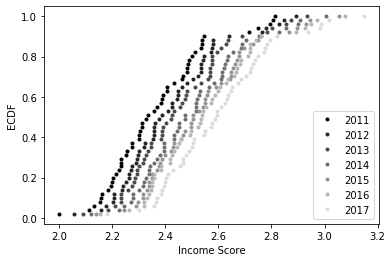

In [4]:
# Compute ECDF for Income Scores for each State 2011-2017: x_val, y_val

irs_subset_df = IRS_df[['STATE','StateScore','YEAR']][IRS_df.YEAR > 2010].drop_duplicates()

for i, yr in enumerate(irs_subset_df.YEAR.unique()):
    x_val, y_val = ecdf(irs_subset_df[irs_subset_df.YEAR==yr].StateScore)

    # Generate plot
    plt.plot(x_val, y_val, marker = '.',linestyle = 'none',color=str(i/len(irs_subset_df.YEAR.unique())),label = str(yr))

# Label the axes
plt.xlabel('Income Score')
plt.ylabel('ECDF')
plt.legend(loc='lower right')


# Display the plot
plt.show()

# Step 2: Parameter Estimation
Estimate the difference of the mean Education and Income Scores of all zip codes from 2011-2017 and report a 95% confidence interval.

In [5]:
# Define bootstrap_replicate_1d function as explained in DataCamp online module (Statistical Thinking in Python - Part 2)
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


# Define draw_bs_reps function as explained in DataCamp online module (Statistical Thinking in Python - Part 2)
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [ ]:
# For years 2011 and 2017 only, obtain the means of Education Scores for all zip codes 
edu_score_2011 = df_2011_2017.edu_score_2011
edu_score_2017 = df_2011_2017.edu_score_2017

# Calculate difference of 2011 and 2017 means
edu_mean_diff = edu_score_2017.mean() - edu_score_2011.mean()

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

In [ ]:
# For years 2011 and 2017 only, obtain the means of Income Scores for all zip codes 
income_score_2011 = df_2011_2017.income_score_2011
income_score_2017 = df_2011_2017.income_score_2017

# Calculate difference of 2011 and 2017 means
income_mean_diff = income_score_2017.mean() - income_score_2011.mean()

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

# Step 3: Confidence Interval Calculation
Use Bootstrap replicates method for 2011 and 2017 datasets only for both Education and Income scores.

In [7]:
# Get bootstrap replicates of means
bs_edu_reps_2011 = draw_bs_reps(edu_score_2011,np.mean,size=10000)
bs_edu_reps_2017 = draw_bs_reps(edu_score_2017,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_edu_reps_2017 - bs_edu_reps_2011

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('Difference of Education Score means =', edu_mean_diff)
print('95% confidence interval =', conf_int)

Difference of Education Score means = 0.12625932693481445
95% confidence interval = [0.11248754 0.13974012]


In [8]:
# For years 2011 and 2017 only, obtain the means of Income Scores for all zip codes 
income_score_2011 = df_2011_2017.income_score_2011
income_score_2017 = df_2011_2017.income_score_2017

# Calculate difference of 2011 and 2017 means
income_mean_diff = income_score_2017.mean() - income_score_2011.mean()

# Get bootstrap replicates of means
bs_income_reps_2011 = draw_bs_reps(income_score_2011,np.mean,size=10000)
bs_income_reps_2017 = draw_bs_reps(income_score_2017,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_income_reps_2017 - bs_income_reps_2011

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('Difference of Income Score means =', income_mean_diff)
print('95% confidence interval =', conf_int)

Difference of Income Score means = 0.2312452793121338
95% confidence interval = [0.22121785 0.24125177]


# Step 4: Hypothesis Testing
Answer the question, “Have Education and Income Scores improved?” (i.e. Null Hypothesis: $\mu_{2017}$ - $\mu_{2011}$ = 0, Alternate Hypothesis: $\mu_{2017}$ - $\mu_{2011}$ > 0) by performing a bootstrap permutation test by shifting the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [9]:
# Compute mean of combined data set: combined_edu_mean
combined_edu_mean = np.mean(np.concatenate((edu_score_2011, edu_score_2017)))

# Shift the samples
edu_score_2011_shifted = edu_score_2011 - np.mean(edu_score_2011) + combined_edu_mean
edu_score_2017_shifted = edu_score_2017 - np.mean(edu_score_2017) + combined_edu_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_2011 = draw_bs_reps(edu_score_2011_shifted,np.mean,size=10000)
bs_replicates_2017 = draw_bs_reps(edu_score_2017_shifted,np.mean,size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2017 - bs_replicates_2011

# Compute the p-value
p = np.sum(bs_diff_replicates >= edu_mean_diff) / len(bs_diff_replicates)

# Print p-value
print('Education Score p =', p)

Education Score p = 0.0


In [10]:
# Compute mean of combined data set: combined_income_mean
combined_income_mean = np.mean(np.concatenate((income_score_2011, income_score_2017)))

# Shift the samples
income_score_2011_shifted = income_score_2011 - np.mean(income_score_2011) + combined_income_mean
income_score_2017_shifted = income_score_2017 - np.mean(income_score_2017) + combined_income_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_2011 = draw_bs_reps(income_score_2011_shifted,np.mean,size=10000)
bs_replicates_2017 = draw_bs_reps(income_score_2017_shifted,np.mean,size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2017 - bs_replicates_2011

# Compute the p-value
p = np.sum(bs_diff_replicates >= income_mean_diff) / len(bs_diff_replicates)

# Print p-value
print('Income Score p =', p)

Income Score p = 0.0


# Step 5: Perform Correlation and Covariance Analysis
Calculate Pearson correlation coefficient and covariance between Education Scores and Income Scores from 2011-2017 (confirm relationship between Education and Income).

# Step 6: Linear Regression
Perform a linear regression for both the 2011 and 2017 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line. (show how Education and Income change together over time)

In [11]:
# Define draw_bs_pairs_linreg function as explained in DataCamp online module (Statistical Thinking in Python - Part 2)
# to perform pairs bootstrap on a set of x,y data
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit( bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [15]:
# Compute the linear regressions
slope_2011, intercept_2011 = np.polyfit(edu_score_2011, income_score_2011, 1)
slope_2017, intercept_2017 = np.polyfit(edu_score_2017, income_score_2017, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_2011, bs_intercept_reps_2011 = draw_bs_pairs_linreg(edu_score_2011, income_score_2011, size=1000)
bs_slope_reps_2017, bs_intercept_reps_2017 = draw_bs_pairs_linreg(edu_score_2017, income_score_2017, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_2011 = np.percentile(bs_slope_reps_2011,[2.5,97.5])
slope_conf_int_2017 = np.percentile(bs_slope_reps_2017,[2.5,97.5])
intercept_conf_int_2011 = np.percentile(bs_intercept_reps_2011,[2.5,97.5])
intercept_conf_int_2017 = np.percentile(bs_intercept_reps_2017,[2.5,97.5])

# Print the results
print('2011: slope =', slope_2011,'\n conf int =', slope_conf_int_2011)
print('2011: intercept =', intercept_2011,'\n conf int =', intercept_conf_int_2011)
print('2017: slope =', slope_2017,'\n conf int =', slope_conf_int_2017)
print('2017: intercept =', intercept_2017,'\n conf int =', intercept_conf_int_2017)

2011: slope = 0.5730035333136285 
 conf int = [0.56560792 0.5800747 ]
2011: intercept = 0.0202510167130084 
 conf int = [-0.00705304  0.05021691]
2017: slope = 0.6338488608392583 
 conf int = [0.62638448 0.64046411]
2017: intercept = -0.07934467649921674 
 conf int = [-0.10650922 -0.04724942]
